In [6]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


## Read File

In [7]:
df= pd.read_csv("Job titles and industries.csv")
df.head()


,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


## Make some Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
job title    8586 non-null object
industry     8586 non-null object
dtypes: object(2)
memory usage: 134.2+ KB


In [10]:
df.industry.value_counts()



IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

In [12]:
df["job title"].value_counts()


marketing executive                                      91
php developer                                            54
software developer                                       53
trainee network technician                               53
marketing manager                                        49
digital marketing executive                              46
trainee it security technician                           45
social media specialist                                  44
trainee it support - no experience required              42
english teacher                                          40
business analyst                                         39
marketing assistant                                      38
.net developer                                           37
graphic designer                                         34
software engineer                                        33
data analyst                                             33
infrastructure engineer                 

In [17]:
df.isnull().sum()

job title    0
industry     0
dtype: int64

In [21]:
import matplotlib.pyplot as plt


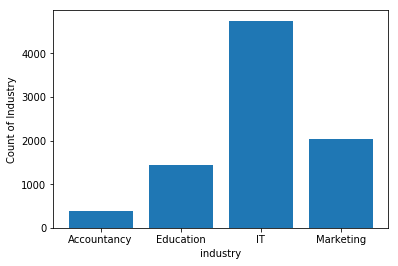

In [24]:
industry_count=df.groupby('industry').count()
plt.bar(industry_count.index.values, industry_count['job title'])
plt.xlabel('industry')
plt.ylabel('Count of Industry')
plt.show()

## create important function

In [33]:
def cleaner(text):
    text = text.lower()
    text = re.sub("german[^\s]+","",text)
    text = re.sub("bournemouth[^\s]+","",text)
    text = re.sub("international[^\s]+","",text)
    text = re.sub("flex[^\s]+","",text)
    text = re.sub("15[^\s]+","",text)
    text = re.sub("flexible[^\s]+","",text)
    text = re.sub("numerous[^\s]+","",text)
    text = re.sub("belfast[^\s]+","",text)
    text = re.sub("on[^\s]+","",text)
    text = re.sub("in[^\s]+","",text)
    text = re.sub("up[^\s]+","",text)
    text = re.sub("45[^\s]+","",text)
    text = re.sub("west[^\s]+","",text)
    text = re.sub("london[^\s]+","",text)
    text = re.sub("part[^\s]+","",text)
    text = re.sub("must[^\s]+","",text)
    text = re.sub("2[^\s]+","",text)
    text = re.sub("1/2[^\s]+","",text)
    text = re.sub("no[^\s]+","",text)
    text = re.sub("Â[^\s]+","",text)
    text = re.sub("12[^\s]+","",text)
    text = text.replace("1st","")  
    text = re.sub("leading [^\s]+","",text)
    text = re.sub("1st[^\s]+","",text)
    text = re.sub("3rd[^\s]+","",text)
    text = re.sub("2nd[^\s]+","",text)
    text = re.sub("bristol[^\s]+","",text)
    text = re.sub("healthcare[^\s]+","",text)
    text = re.sub("good[^\s]+","",text)
    text = re.sub("pool[^\s]+","",text)
    text = re.sub("6 months[^\s]+","",text)
    text = re.sub("free[^\s]+","",text)
    text = re.sub("invest[^\s]+","",text)
    text = text.replace("o365","")
    text = text.replace("remote","")
    text = text.replace("-"," ")
    text = text.replace("/"," ")
    text = text.replace("("," ")
    text = text.replace(")"," ")
    text = text.replace("soa04086"," ")
    return text

In [34]:
def remove_stop_words(text):
    sw = stopwords.words("english")
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

In [35]:
def stemming(text):
    ps = PorterStemmer()
    text = text.split()
    stemmed_words = []
    for word in text :
        stemmed_words.append(ps.stem(word))
    return " ".join(stemmed_words)

In [36]:
def run(text):
    text = cleaner(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [37]:
df['job title'] = df['job title'].apply(run)

In [38]:
df.head()

,job title,industry
0,technic helpdesk counti build ayr,IT
1,senior technic eng,IT
2,head servic,IT
3,js fr end eng,IT
4,network teleph c,IT


## convert words to vector

In [39]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["job title"]).toarray()

In [40]:
df['industry'] = df['industry'].replace("IT",0)
df['industry'] = df['industry'].replace("Marketing",1)
df['industry'] = df['industry'].replace("Education",2)
df['industry'] = df['industry'].replace("Accountancy",3)



In [41]:
y = df['industry'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Split Data

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

## Building Model

In [43]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = lr.predict(x_test)

In [45]:
lr.score(x_test,y_test)

0.8910107126222636

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC


In [50]:
clfs = [GaussianNB(),SVC(kernel="linear"),SVC(kernel="rbf"),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for clf in clfs:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("===================",clf)
    #print(clf.score(x_test,y_test)*100)
    print(clf.score(x_test,y_test))

=================== GaussianNB(priors=None, var_smoothing=1e-09)
0.632044713553796
=================== SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9105728924080112


C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


=================== SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.5542617605961807
=================== DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.9049836981835119
=================== RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimator

## Chosen Model

In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_pred = lr.predict(x_test)

In [58]:
model.score(x_test,y_test)

0.9203539823008849

## Model Serialization


In [60]:
import pickle


In [62]:
pickle.dump(model, open('finalModel', 'wb'))

## Test

In [63]:
test = "Technical Support"
test = run(test)
test = tfidf.transform([test]).toarray()

In [64]:
model.predict(test)

array([0], dtype=int64)

In [66]:
test2 = "media manager"
test2 = run(test2)
test2 = tfidf.transform([test2]).toarray()

In [67]:
model.predict(test2)

array([1], dtype=int64)

## Model Evaluation

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1262
           1       0.87      0.90      0.88       467
           2       0.87      0.96      0.91       341
           3       0.65      0.84      0.73        77

   micro avg       0.92      0.92      0.92      2147
   macro avg       0.84      0.91      0.87      2147
weighted avg       0.93      0.92      0.92      2147



## Refrences

https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
https://github.com/krishnaik06/NLP-Model-Deployment